In [1]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, top_k_accuracy_score

# 🚀 Step 1: Load features and labels
print("📦 Loading features and labels...")
features = np.load("features.npy")  # shape: (24000, 2048)
y = np.load("y_fingerprint_segmented.npy")  # shape: (24000,)
print("✅ Features shape:", features.shape)
print("✅ Labels shape:", y.shape)

# 🚀 Step 2: Train/Test split
print("🔄 Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, stratify=y, random_state=42
)
print("✅ Split done.")

# 🚀 Step 3: Initialize XGBoost
print("⚙️ Initializing XGBoost...")
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    tree_method='hist'
)

# 🚀 Step 4: Train
print("🚀 Starting XGBoost training...")
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
print("✅ Training complete.")

# 🚀 Step 5: Evaluate
print("🔍 Predicting and evaluating...")
y_pred_top1 = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)

acc_top1 = accuracy_score(y_test, y_pred_top1)
acc_top3 = top_k_accuracy_score(y_test, y_pred_proba, k=3)
acc_top5 = top_k_accuracy_score(y_test, y_pred_proba, k=5)

print(f"🎯 Top-1 Accuracy: {acc_top1 * 100:.2f}%")
print(f"🎯 Top-3 Accuracy: {acc_top3 * 100:.2f}%")
print(f"🎯 Top-5 Accuracy: {acc_top5 * 100:.2f}%")

# 🚀 Step 6: Save XGBoost model as JSON
print("💾 Saving model to xgb_model.json...")
xgb.save_model("xgb_model.json")
print("✅ Model saved as xgb_model.json")


📦 Loading features and labels...
✅ Features shape: (24000, 2048)
✅ Labels shape: (24000,)
🔄 Splitting dataset...
✅ Split done.
⚙️ Initializing XGBoost...
🚀 Starting XGBoost training...
[0]	validation_0-mlogloss:2.02846
[1]	validation_0-mlogloss:1.98330
[2]	validation_0-mlogloss:1.94215
[3]	validation_0-mlogloss:1.90401
[4]	validation_0-mlogloss:1.86964
[5]	validation_0-mlogloss:1.84011
[6]	validation_0-mlogloss:1.81162
[7]	validation_0-mlogloss:1.78480
[8]	validation_0-mlogloss:1.76034
[9]	validation_0-mlogloss:1.73847
[10]	validation_0-mlogloss:1.71716
[11]	validation_0-mlogloss:1.69714
[12]	validation_0-mlogloss:1.67821
[13]	validation_0-mlogloss:1.66066
[14]	validation_0-mlogloss:1.64461
[15]	validation_0-mlogloss:1.62977
[16]	validation_0-mlogloss:1.61623
[17]	validation_0-mlogloss:1.60242
[18]	validation_0-mlogloss:1.58961
[19]	validation_0-mlogloss:1.57734
[20]	validation_0-mlogloss:1.56599
[21]	validation_0-mlogloss:1.55423
[22]	validation_0-mlogloss:1.54397
[23]	validation_0-ml

C:\Users\reshh\AppData\Local\Temp\ipykernel_5528\3551618848.py:21: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\reshh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


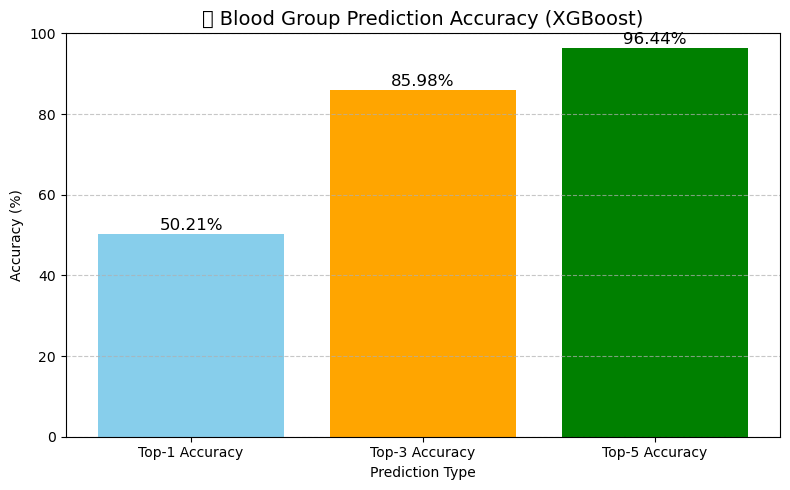

In [5]:
import matplotlib.pyplot as plt

# 📊 Bar chart for accuracies
accuracies = [acc_top1 * 100, acc_top3 * 100, acc_top5 * 100]
labels = ['Top-1 Accuracy', 'Top-3 Accuracy', 'Top-5 Accuracy']
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracies, color=colors)
plt.ylim(0, 100)

# 🏷️ Add text labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', fontsize=12)

plt.title('🎯 Blood Group Prediction Accuracy (XGBoost)', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xlabel('Prediction Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
from xgboost import XGBClassifier

# Load model from JSON
model = XGBClassifier()
model.load_model("xgb_model.json")

# Use model.predict() or model.predict_proba()
